<a href="https://colab.research.google.com/github/probml/probml-notebooks/blob/main/notebooks/GCS_demo_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Authenticate in order to access the GCS

We don't need authentication to access public data in GCloud but
in order to access protected data or write to a protected bucket, you need to set up credentials (authenticate)

In [ ]:
from google.colab import auth

auth.authenticate_user()

### Setting a project

We need to choose a project inorder to work with buckets, if you dont have any, create a project in Gcloud [**Console**](https://console.cloud.google.com/storage/browser?_ga=2.260409357.104440840.1625245885-649740148.1623669299) 

First we need to set a default project using the project_id so that you are able to use commands which unless require specifying the project.

`glcoud` can be used to set the default project.

In [ ]:
project_id = "your_project_id"

In [ ]:
!gcloud config set project {project_id}

Updated property [core/project].


To take a quick anonymous survey, run:
  $ gcloud survey



## Using **gsutil**- CLI for GCloud

[Docs](https://cloud.google.com/storage/docs/gsutil/commands/help)



### Create

command to create a bucket

```
gsutil mb [-b (on|off)] [-c <class>] [-l <location>] [-p <proj_id>]
          [--retention <time>] [--pap <setting>] gs://<bucket_name>...
```


In [ ]:
import uuid

bucket_name = "colab-sample-bucket-" + str(uuid.uuid1())

This will create a bucket with `bucket_name` with default configurations.

In [ ]:
!gsutil mb gs://{bucket_name}

Creating gs://colab-sample-bucket-01de0f0e-dd79-11eb-90f2-0242ac1c0002/...


Creating a local folder with a test file to upload to the bucket

In [ ]:
!mkdir /tmp/test_folder

In [ ]:
with open("/tmp/test_folder/test_file.txt", "w") as f:
    f.write("this file get saved in the test_folder")

Uploading the folder to the bucket

The object  `gs://{bucket_name}/test_folder/test_file.txt` is created. 

In [ ]:
!gsutil cp -r /tmp/test_folder gs://{bucket_name}

Copying file:///tmp/test_folder/test_file.txt [Content-Type=text/plain]...
/ [1 files][   38.0 B/   38.0 B]                                                
Operation completed over 1 objects/38.0 B.                                       


In [ ]:
# @markdown Once the upload has finished, the data will appear in the Cloud Console storage browser for your project:
print("https://console.cloud.google.com/storage/browser?project=" + project_id)

https://console.cloud.google.com/storage/browser?project=probml-test


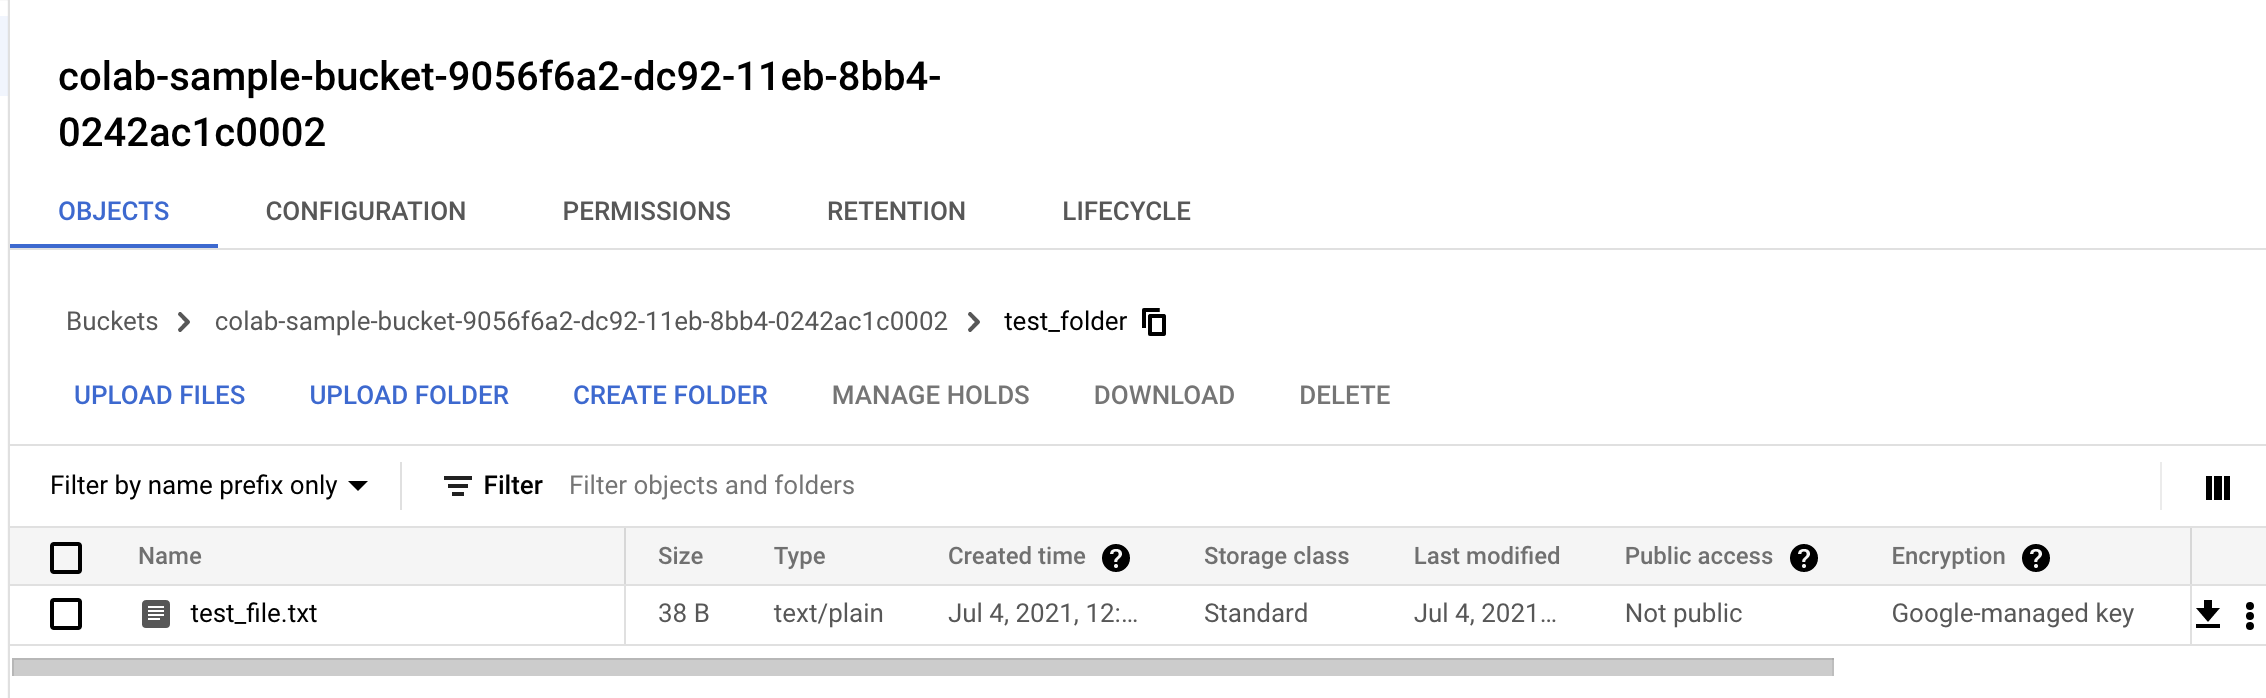

### Read

The contents of the uploaded file in the bucket can be read in this way

In [ ]:
!gsutil cat gs://{bucket_name}/test_folder/test_file.txt

this file get saved in the test_folder

The whole folder/file from the bucket can be downloaded in this way.

In [ ]:
!gsutil cp -r gs://{bucket_name}/test_folder /content/
!gsutil cp  gs://{bucket_name}/test_folder/test_file.txt /content/

Copying gs://colab-sample-bucket-01de0f0e-dd79-11eb-90f2-0242ac1c0002/test_folder/test_file.txt...
/ [1 files][   38.0 B/   38.0 B]                                                
Operation completed over 1 objects/38.0 B.                                       
Copying gs://colab-sample-bucket-01de0f0e-dd79-11eb-90f2-0242ac1c0002/test_folder/test_file.txt...
/ [1 files][   38.0 B/   38.0 B]                                                
Operation completed over 1 objects/38.0 B.                                       


### Update

**Updating a file**

Edit the local copy and overwrite the file in the bucket.

In [ ]:
with open("/tmp/test_folder/test_file.txt", "a") as f:
    f.write(" this new string is added later")
!gsutil cp  /tmp/test_folder/test_file.txt gs://{bucket_name}/test_folder

Copying file:///tmp/test_folder/test_file.txt [Content-Type=text/plain]...
/ [1 files][   69.0 B/   69.0 B]                                                
Operation completed over 1 objects/69.0 B.                                       


In [ ]:
!gsutil cat gs://{bucket_name}/test_folder/test_file.txt

this file get saved in the test_folder this new string is added later

If you want to **update a folder** in the bucket to be in sync with a local copy of the folder, use `rsync`

Making some changes to the `test_folder`

In [ ]:
!rm /tmp/test_folder/test_file.txt

adding a new file `test_file2.txt`

In [ ]:
with open("/tmp/test_folder/test_file2.txt", "w") as f:
    f.write("this is a new file named test_file2")

You can check the contents of your bucket at any level using the `ls` cmd.

bucket contents before updating.

In [ ]:
!gsutil ls gs://{bucket_name}/test_folder

gs://colab-sample-bucket-01de0f0e-dd79-11eb-90f2-0242ac1c0002/test_folder/test_file.txt


In [ ]:
!gsutil rsync -d /tmp/test_folder gs://{bucket_name}/test_folder

Building synchronization state...
Starting synchronization...
Removing gs://colab-sample-bucket-01de0f0e-dd79-11eb-90f2-0242ac1c0002/test_folder/test_file.txt
Copying file:///tmp/test_folder/test_file2.txt [Content-Type=text/plain]...
/ [1 files][   35.0 B/   35.0 B]                                                
Operation completed over 1 objects/35.0 B.                                       


bucket contents after updating.

In [ ]:
!gsutil ls gs://{bucket_name}/test_folder

gs://colab-sample-bucket-01de0f0e-dd79-11eb-90f2-0242ac1c0002/test_folder/test_file2.txt


### Delete

**Contents of a bucket** can be deleted using `rm` command

In [ ]:
!gsutil rm -r gs://{bucket_name}/test_folder

Removing gs://colab-sample-bucket-01de0f0e-dd79-11eb-90f2-0242ac1c0002/test_folder/test_file2.txt#1625480325741016...
/ [1 objects]                                                                   
Operation completed over 1 objects.                                              


In [ ]:
!gsutil ls gs://{bucket_name}

**Deleting a bucket**

The rb command deletes a bucket. Buckets must be empty before you can delete them.

In [ ]:
!gsutil rb gs://{bucket_name}

Removing gs://colab-sample-bucket-01de0f0e-dd79-11eb-90f2-0242ac1c0002/...


## Making TFDS records

In [ ]:
import tensorflow_datasets as tfds

source_dir = "gs://gsoc_bucket/ILSVRC2012/"
dest_dir = "gs://gsoc_bucket/ILSVRC2012_tf_records"
tfds.builder("imagenet2012", data_dir=dest_dir).download_and_prepare(
    download_config=tfds.download.DownloadConfig(manual_dir=source_dir)
)

## Using GC **python API**

### Create

Creating a bucket

In [ ]:
bucket_name = "colab-sample-bucket-" + str(uuid.uuid1())

In [ ]:
# Imports the Google Cloud client library
from google.cloud import storage

# Instantiates a client
storage_client = storage.Client(project=project_id)

# Creates the new bucket
bucket = storage_client.create_bucket(bucket_name)

print("Bucket {} created.".format(bucket.name))

Bucket colab-sample-bucket-b6110624-dd7a-11eb-90f2-0242ac1c0002 created.


In [ ]:
!mkdir /tmp/test_api_folder

In [ ]:
with open("/tmp/test_api_folder/test_api_file.txt", "w") as f:
    f.write("this file get saved in the test_api_folder")

Uploading a object (a file with its path)

In [ ]:
destination_blob_name = "test_api_folder/test_api_file.txt"
source_file_name = "/tmp/test_api_folder/test_api_file.txt"

blob = bucket.blob(destination_blob_name)

blob.upload_from_filename(source_file_name)

print("File {} uploaded to {}.".format(source_file_name, destination_blob_name))

File /tmp/test_api_folder/test_api_file.txt uploaded to test_api_folder/test_api_file.txt.


In [ ]:
# @markdown Once the upload has finished, the data will appear in the Cloud Console storage browser for your project:
print("https://console.cloud.google.com/storage/browser?project=" + project_id)

https://console.cloud.google.com/storage/browser?project=probml-test


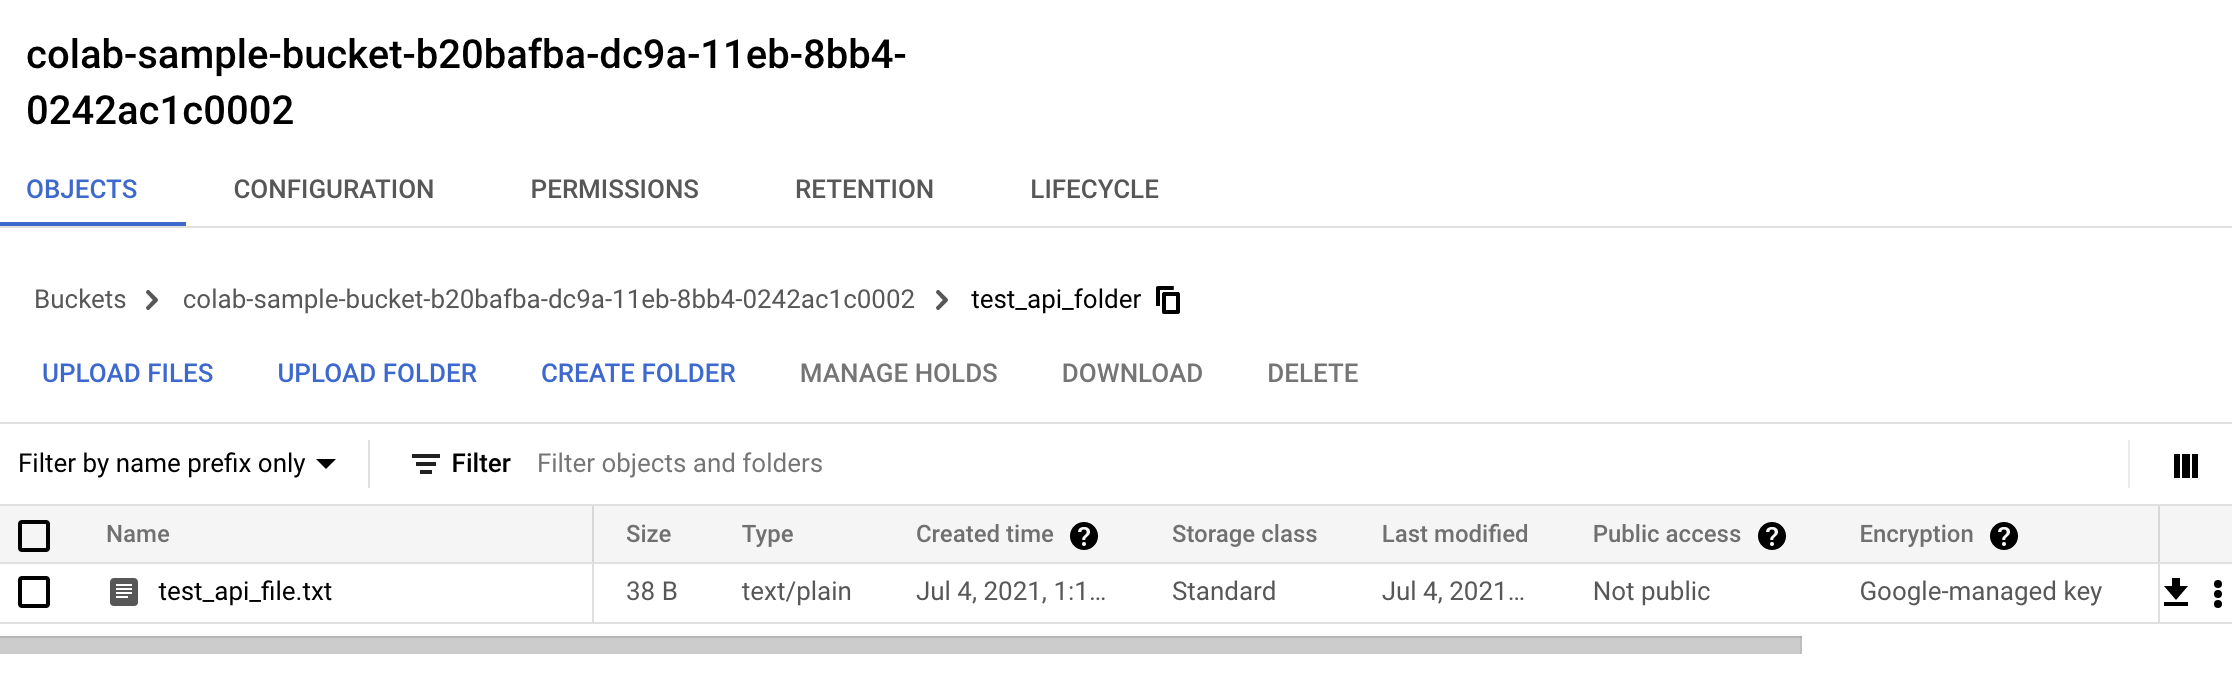

### Read

In [ ]:
source_blob_name = "test_api_folder/test_api_file.txt"
destination_file_name = "/content/downloaded_test_api.txt"
source_blob = bucket.blob(source_blob_name)
source_blob.download_to_filename(destination_file_name)
print("Blob {} downloaded to {}.".format(source_blob_name, destination_file_name))

Blob test_api_folder/test_api_file.txt downloaded to /content/downloaded_test_api.txt.


In [ ]:
!cat /content/downloaded_test_api.txt

this file get saved in the test_api_folder

To easily download all objects in a bucket or subdirectory, use the `gsutil cp` command.

### Update

**Updating a file/object**
Its simply overwriting the existing copy of the object.

In [ ]:
with open("/tmp/test_api_folder/test_api_file.txt", "a") as f:
    f.write(" this is an appended string")

In [ ]:
source_file_name = "/tmp/test_api_folder/test_api_file.txt"
destination_blob_name = "test_api_folder/test_api_file.txt"
destination_file_name = "/content/downloaded_test_api.txt"

blob = bucket.blob(destination_blob_name)
blob.upload_from_filename(source_file_name)
print("File {} uploaded to {}.".format(source_file_name, destination_blob_name))
blob.download_to_filename(destination_file_name)
print("Blob {} downloaded to {}.".format(destination_blob_name, destination_file_name))

File /tmp/test_api_folder/test_api_file.txt uploaded to test_api_folder/test_api_file.txt.
Blob test_api_folder/test_api_file.txt downloaded to /content/downloaded_test_api.txt.


In [ ]:
!cat /content/downloaded_test_api.txt

this file get saved in the test_api_folder this is an appended string

### Delete

objects can be deleted easily by using `blob.delete()`

When a folder is empty it will be vanished.

In [ ]:
blob_name = "test_api_folder/test_api_file.txt"
blob = bucket.blob(blob_name)
blob.delete()
print("Blob {} deleted.".format(blob_name))

Blob test_api_folder/test_api_file.txt deleted.


In [ ]:
!gsutil ls gs://{bucket_name}

**Deleting a bucket**

In [ ]:
bucket.delete()
print("Bucket {} deleted".format(bucket.name))

Bucket colab-sample-bucket-b6110624-dd7a-11eb-90f2-0242ac1c0002 deleted


## Using **gcsfuse**(mount) and bash

Another way is to mount the GCS bucket to the current session of colab and you can make any regular(CRUD) operations using bash commands(just like on any other directory)

In order to use this, you should first create a bucket you can do this using any of the methods described above)

`gsutil mb` is used here

### Create

In [ ]:
import uuid

bucket_name = "colab-sample-bucket-" + str(uuid.uuid1())
!gsutil mb gs://{bucket_name}

Creating gs://colab-sample-bucket-040005ec-dd7b-11eb-90f2-0242ac1c0002/...


Mounting the bucket to `/content/{bucket_name}`

In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse
!mkdir $bucket_name
!gcsfuse $bucket_name /content/$bucket_name

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0   117k      0 --:--:-- --:--:-- --:--:--  117k
OK
97 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 97 not upgraded.
Need to get 10.8 MB of archives.
After this operation, 23.1 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.35.1_amd64.deb ...
Unpacking gcsfuse (0.35.1) ...
Setting up gcsfuse (0.35.1) ...
2021/07/05 10:23:33.657719 Using mount point: /content/colab-sample-bucket-040005ec-dd7b-11eb-90f2-0242ac1c0002
2021/07/05 10:23:33.665572 Opening GCS connection...
2021/07/05 10:23:34.233955 Mounting file system "colab-sample-buc

In [ ]:
cd /content/$bucket_name

/content/colab-sample-bucket-040005ec-dd7b-11eb-90f2-0242ac1c0002


Creating a folder

In [ ]:
!mkdir test_mount_folder

Creating a file/object in the folder just created.

In [ ]:
with open("./test_mount_folder/test_mount_file.txt", "w") as f:
    f.write("this file get saved in the test_folder you just created")

In [ ]:
# @markdown Once the upload has finished, the data will appear in the Cloud Console storage browser for your project:
print("https://console.cloud.google.com/storage/browser?project=" + project_id)

https://console.cloud.google.com/storage/browser?project=probml-test


![](https://drive.google.com/uc?export=view&id=18NBm0ulEE3TzZXnvXL1IKgrEKQQQQX6s)
  

### Read

As the bucket is already mounted you can just access files by opening them using `files` or just double clicking the file

In [ ]:
from google.colab import files

files.view(f"/content/{bucket_name}/test_mount_folder/test_mount_file.txt")

<IPython.core.display.Javascript object>

In [ ]:
!cat ./test_mount_folder/test_mount_file.txt

this file get saved in the test_folder you just created

### Update

**Update to file**

Update can be done normally either by editing or by using python.

In [ ]:
with open("./test_mount_folder/test_mount_file.txt", "a") as f:
    f.write(" this new string is added later")
files.view(f"/content/{bucket_name}/test_mount_folder/test_mount_file.txt")

<IPython.core.display.Javascript object>

**Update to folder**

New files can be added either by colab's UI or by using python or any other way that works for regular dirs.

In [ ]:
!echo "this is a second file to test_folder in the bucket" >> ./test_mount_folder/test_mount_file2.txt

![](https://drive.google.com/uc?export=view&id=1-3V0sKY2nUfalhERPbyrlD74BKz_IlGy)

In [ ]:
!cat ./test_mount_folder/test_mount_file2.txt

this is a second file to test_folder in the bucket


### Delete

`rm` cmd can be used to delete the objects of the bucket using the mounted path.

**Deleting the file** `{bucket_name}/test_mount_folder/test_mount_file.txt`

In [ ]:
!rm ./test_mount_folder/test_mount_file.txt

![](https://drive.google.com/uc?export=view&id=1fmOv3KIf0p0i2WnjYdfoHPrD8X_q8INd)

to delete the folder we can sue `rm -r` or `-rm -rf` to force remove

In [ ]:
!rm -r ./test_mount_folder

![](https://drive.google.com/uc?export=view&id=1oOzo9geZswQw8toOsI-_u8y6y2M_KCQF)

**Deleting a bucket**

you can't delete a bucekt using gcsfuse, but you can unmount the mounted path and then can delete using any of the above mentioned ways.

**Unmount the bucket**

After unmounting, any changes in the local path will not be rendered in the cloud bucket.

In [ ]:
cd ..

/content


In [ ]:
!fusermount -u /content/$bucket_name

deleting the bucket using gsutil.

In [ ]:
!gsutil rb gs://{bucket_name}

Removing gs://colab-sample-bucket-040005ec-dd7b-11eb-90f2-0242ac1c0002/...


## Using GC **UI**

Bucketa can be also be accessed directly through Gcloud Consoles's UI.

In [ ]:
# @markdown Go to your project's browser:
print("https://console.cloud.google.com/storage/browser?project=" + project_id)

https://console.cloud.google.com/storage/browser?project=Your_project_ID_here


### Create

Bucket can be created in the following way.

In [ ]:
# Pick a bucket name, they should be unique,
# for the demo purpose we can create a bucket name in this way
import uuid

bucket_name = "colab-sample-bucket-" + str(uuid.uuid1())
bucket_name

'colab-sample-bucket-ee7dc7fe-dd7a-11eb-90f2-0242ac1c0002'

* In the Storage browser, click `CREATE BUCKET`

![](https://drive.google.com/uc?export=view&id=1SfvPm3xxfBk6kytNqLr2uywps1Ij6oFi)

* Fill in the name of the bucket,as it is a sample bucket, other configs can be left as default
![](https://drive.google.com/uc?export=view&id=1yF6o0eeLt1V135IZmRgF5SRM9aISSYOd)

* To create a folder, click `CREATE FOLDER` in the corresponding bucket's page.
![](https://drive.google.com/uc?export=view&id=1xmGMmZ4F857S6DLYEE6EDn4XwEMI5f4W)
*  To upload files files to this folder, you can use `UPLOAD FILES`
![](https://drive.google.com/uc?export=view&id=1SfK8nulJi76b_hGUIAnIyZlPjDhGlM8J)

![](https://drive.google.com/uc?export=view&id=1ejYpEb-WCGiGUu2OXu52ehwZdEDYral0)



### Read

* Files cannot be read directly using UI,but their metadata and permissions can be viewed



![](https://drive.google.com/uc?export=view&id=1Jrw-Oyr4c18OwnoV1HrA_Od6jpDQqyjv)

* Through UI we can download the files easily through `DOWNLOAD` button after choosing the needed object
![](https://drive.google.com/uc?export=view&id=1gfwY3UyHw8sscaaDeulTBMH8p3PrzXvS)


### Update

To update the bucket, we can upload files through `UPLOAD FILES` button at a given path.

![](https://drive.google.com/uc?export=view&id=1f7lU_fS5CbA9Q_cBLdLHwLsNkuf2PyYm)


### Delete

* To delete any object in the bucket, we can use `DELETE` option.
![](https://drive.google.com/uc?export=view&id=1mVDIXBSuwb5r00WHNS4L3bChP1Ah3bgI)

* To delete the bucket, go back to the your project's browser and select the checkbox of the bucket you want to delete and click `DELETE`.

![](https://drive.google.com/uc?export=view&id=1Zhiu8rJEpTNFX3cYeC_2swVlkw22l2sN)